Maximum likelihood is one of the fundemental concepts in statistics and artificial intelligence algorithms. What does it mean and how is it used in practice?

Suppose you have some dataset $\mathcal{D}$ and a possible hypothesis $h$ of the latent function that might have generated the dataset. The probability distribution of the dataset given the hypothesis $p(\mathcal{D}|h)$ is called **likelihood** of the hypothesis given the dataset and we can write $\mathcal{L}(h|\mathcal{D}) = p(\mathcal{D}|h)$. 

Here are some examples for this abstract concept:
1. a hypothesis might be a **Gaussian distribution** $\mathcal{N}(\boldsymbol{x}|\boldsymbol{\mu}, \boldsymbol{\Sigma})$ and a dataset might consist of observed samples $x^n$
2. a hypothesis might be a parameterizable function like $f_\boldsymbol{\theta}(\boldsymbol{x}) = \boldsymbol{\theta}^T\boldsymbol{x}$ and a dataset might be observed pairs of inputs $\boldsymbol{x}^n$ and corresponding outputs $\boldsymbol{y}^n$ (**linear regression**)
3. a hypothesis might be a generative function $\boldsymbol{x} = \boldsymbol{W}\boldsymbol{z} + \boldsymbol{\mu}$ and a dataset might be a set of observed samples $\boldsymbol{x}_n$ (**probabilistic principal component analysis**)

A maximum likelihood estimate corresponds to $h^{MLE} = \arg \max_h \mathcal{L}(h|\mathcal{D})$ which means we take hypothesis for which the probability of the dataset has its peak.

## Gaussian Distribution

The probability of the data given the hypothesis (determined by $\mu$, $\sigma$ in a one-dimensional normal distribution) and hence the likelihood is given by
$$\mathcal{L}(h|\mathcal{D}) = \prod_{x \in \mathcal{D}}\mathcal{N}(x|\mu, \sigma^2) = \prod_{x \in \mathcal{D}} \frac{1}{\sqrt{2\sigma^2\pi}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right).$$

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def normal_likelihood(x, mu, sigma):
    return np.prod(1.0 / (np.sqrt(2 * sigma ** 2 * np.pi)) *
                   np.exp(-((x - mu) ** 2) / (2 * sigma ** 2)))

We can plot the likelihood for several combinations of $\mu$ and $\sigma$. We can plot the maximum likelihood of $\mu$ and $\sigma$ as well.

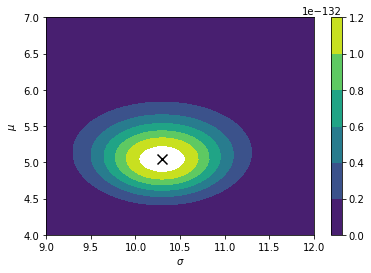

In [3]:
random_state = np.random.RandomState(0)

samples = 5.0 * random_state.randn(100) + 10.0
mus, sigmas = np.meshgrid(np.linspace(9, 12, 50),
                          np.linspace(4, 7, 50))
likelihoods = []
for m, v in zip(mus.ravel(), sigmas.ravel()):
    likelihoods.append(normal_likelihood(samples, m, v))
likelihoods = np.array(likelihoods).reshape(*mus.shape)
plt.contourf(mus, sigmas, likelihoods)
plt.colorbar()
plt.scatter(np.mean(samples), np.std(samples), s=100,
            marker="x", color="k")
plt.xlabel("$\sigma$")
plt.ylabel("$\mu$")
_ = plt.setp(plt.gca(), xlim=(np.min(mus), np.max(mus)),
             ylim=(np.min(sigmas), np.max(sigmas)))

The formulas that we used to compute the maximum likelihood estimates are $\hat{\mu} = \frac{1}{|\mathcal{D}|}\sum_{x \in \mathcal{D}} x$ and $\hat{\sigma} = \frac{1}{|\mathcal{D}|}\sum_{x \in \mathcal{D}} (x - \mu)^2$.

These formulas can be derived by solving an optimization problem for which we can compute the analytical solution directly. That is, we calculate the derivative of the likelihood function, compute its root, and prove that it is a maximum by showing that the second derivative is greater than zero. Theoretically we can use this approach to solve any maximum likelihood problem.

Maximizing the likelihood is equivalent to minimizing the negative log likelihood. This is often useful because the equations become simpler or numeric values become smaller. This might be better for numerical optimization, for example, if we are working with $\exp$. In this case, for example, we can write
$$\arg\min_{h} - \log \mathcal{L}(h|\mathcal{D}) = \arg\min_{\mu, \sigma} c \sum_{x \in \mathcal{D}} \frac{(x - \mu)^2}{2\sigma^2},$$
where $c$ is some irrelevant constant.

## Linear Regression

The goal of [regression](http://alexanderfabisch.github.io/regression.html) is to approximate an unknown latent function $f: \mathbb{R}^D \rightarrow \mathbb{R}^F$. We assume that we cannot measure pairs of inputs and outputs directly. We measure samples $(\boldsymbol{x}_n \in \mathbb{R}^D, \boldsymbol{y}_n \in \mathbb{R}^F)$, where $\boldsymbol{y}_n = f(\boldsymbol{x}_n) + \boldsymbol{\epsilon}_n$ and $\boldsymbol{\epsilon}_n \in \mathbb{R}^F$ is the measurement error. In the simplest case, we assume that the measurement error is normally distributed, that is, $\boldsymbol{\epsilon}_n \in \mathcal{N}(\boldsymbol{0}, \boldsymbol{\Sigma})$. Note that we assume the same noise level for each input which means we assume a homoscedastic noise level (the opposite would be heteroscedasticity).

To find the maximum likelihood estimate for $f$, we typically assume a parametric form of $f$, for example a linear function
$$f_{\boldsymbol{w}, b}(\boldsymbol{x}) = \boldsymbol{w}^T \boldsymbol{x} + b,$$
where the hypothesis space is fully defined by all possible combinations of $\boldsymbol{w} \in \mathbb{R}^D$ and $b \in \mathbb{R}$. The probability of the dataset can hence be computed as 
$$p(\mathcal{D}|h) = \prod_{(\boldsymbol{x}, \boldsymbol{y}) \in \mathcal{D}} \mathcal{N}(\boldsymbol{y}|\boldsymbol{w}^T \boldsymbol{x} + b, \boldsymbol{\Sigma}).$$

The maximum likelihood estimate is again a solution to the optimization problem (note that we made many simplifications in this step):
$$\arg\min_{h} - \log \mathcal{L}(h|\mathcal{D}) =  \arg\min_{\boldsymbol{w}, b} \sum_{(\boldsymbol{x}, \boldsymbol{y}) \in \mathcal{D}} ||\boldsymbol{y} - (\boldsymbol{w}^T\boldsymbol{x} + b)||^2.$$
We can derive this so-called sum of squared errors with respect to the parameters of the linear function and compute the derivative's root to obtain the maximum likelihood estimate.

For a linear model we can find a direct solution. For more complex nonlinear models (e.g. neural networks) this might not be trivial and it might not be possible to find the global optimum of the objective function.

In [4]:
random_state = np.random.RandomState(1)
real_theta = random_state.randn(2)


def model(X, theta):
    return X.dot(theta[:-1]) + theta[-1]


def latent_function(X):
    return model(X, real_theta)


n_samples = 20
X_samples = random_state.rand(n_samples, 1)
sigma = 0.2
error = sigma * random_state.randn(n_samples)
y_samples = latent_function(X_samples) + error

X_samples_bias = np.hstack((X_samples, np.ones((n_samples, 1))))

For the given dataset, we can plot the likelihood for several combinations of $w$ and $b$.

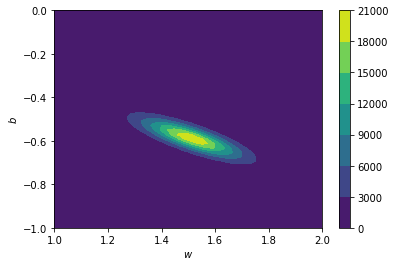

In [5]:
def linear_likelihood(X_samples, y_samples, w, b):
    y_pred = model(X_samples, np.array([w, b]))
    errors = (y_samples - y_pred) ** 2
    variance = np.mean(errors)
    return np.prod(1.0 / (np.sqrt(2 * variance * np.pi)) *
                   np.exp(-errors / (2 * variance)))


ws, bs = np.meshgrid(np.linspace(1, 2, 50),
                     np.linspace(-1, 0, 50))
likelihoods = []
for w, b in zip(ws.ravel(), bs.ravel()):
    likelihoods.append(linear_likelihood(X_samples, y_samples, w, b))
likelihoods = np.array(likelihoods).reshape(*ws.shape)
plt.contourf(ws, bs, likelihoods)
plt.colorbar()
plt.xlabel("$w$")
plt.ylabel("$b$")
_ = plt.setp(plt.gca(), xlim=(np.min(ws), np.max(ws)),
             ylim=(np.min(bs), np.max(bs)))

We can take a look at the resulting maximum likelihood estimate and compare it with the true function which is usually unknown.

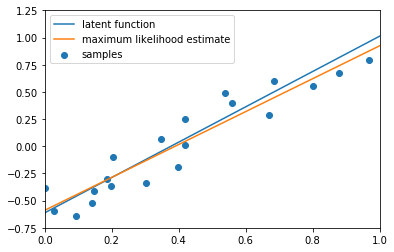

In [6]:
# NumPy implements the function np.linalg.lstsq which solves the
# linear regression problem for us:
theta_mle, error, _, _ = np.linalg.lstsq(X_samples_bias, y_samples)

plt.scatter(X_samples.ravel(), y_samples,
            label="samples")
X_test = np.linspace(0, 1, 101)[:, np.newaxis]
plt.plot(X_test.ravel(), latent_function(X_test),
         label="latent function")
plt.plot(X_test.ravel(), model(X_test, theta_mle),
         label="maximum likelihood estimate")
plt.setp(plt.gca(), xlim=(0, 1), ylim=(-0.75, 1.25))
plt.legend(loc="best")

## Probabilistic Principal Component Analysis

Principal component analsysis (PCA) is a dimensionality reduction method. Probabilistic PCA is a probabilistic derivation that results in the same solution. Let us assume we observe samples $\boldsymbol{x}_n \in \mathcal{D} \subseteq \mathbb{R}^q$. We assume the data is generated by some unknown (linear) generative function, so that
$$\boldsymbol{x}_n = \boldsymbol{W}\boldsymbol{z}_n + \boldsymbol{\mu} + \boldsymbol{\epsilon},$$
$\boldsymbol{z}_n \in \mathbb{R}^d$ is unknown, and $\boldsymbol{\epsilon} \in \mathbb{R}^q$ is again some normally distributed noise, that is,
$$p(\boldsymbol{z}) = \mathcal{N}(\boldsymbol{z}|\boldsymbol{0}, \boldsymbol{I}),$$
$$p(\boldsymbol{x}|\boldsymbol{z}) = \mathcal{N}(\boldsymbol{x}|\boldsymbol{W}\boldsymbol{z} + \boldsymbol{\mu}, \sigma^2\boldsymbol{I}).$$
Usually the dimension of the observed data $q$ is greater than $d$ because we want to reduce the dimensionality of the data and find a more meaningful representation.

We have to maximize the likelihood
$$\prod_n p(\boldsymbol{x}_n, \boldsymbol{z}_n|\boldsymbol{W}, \boldsymbol{\mu}, \sigma),$$
however, the corresponding latent samples $\boldsymbol{z}$ are unknown. An algorithm that we can use to solve these kind of maximum likelihood problems is expectation maximization. It alternates between an expectation step in which we compute the expectation of the latent variables $\boldsymbol{z}$ given the current values of $\boldsymbol{W}$ and $\boldsymbol{\mu}$ and the maximization step in which we maximize the likelihood of the model given the data or we minimize the negative log-likelihood (very similar to linear regression) to compute $\boldsymbol{W}$ and $\boldsymbol{\mu}$ given the current values of $\boldsymbol{z}$.

We can arrange all observed samples in a matrix $\boldsymbol{X}$ and the latent variables in a matrix $\boldsymbol{Z}$. Each row corresponds to one sample. The following cost function must be minimized:
$$-\log \mathcal{L}(h|\mathcal{D}) = -\log p(\boldsymbol{X}, \boldsymbol{Z}|\mu, \boldsymbol{W}, \sigma^2).$$

We can simplify this a little bit if we center the data before we apply expectation maximization. This eliminates $\boldsymbol{\mu}$ from all equations. Now, we can alternate between these two simple steps:

1. Expectation: $$\boldsymbol{Z} = \boldsymbol{X} \left( \left(\boldsymbol{W}^T \boldsymbol{W}\right)^{-1} \boldsymbol{W}^T \right)^T$$
2. Maximization: $$\boldsymbol{W} = \left( \boldsymbol{Z}^T \left(\boldsymbol{Z} \boldsymbol{Z}^T \right)^{-1}  \boldsymbol{X} \right)^T$$

(We could get rid of some transposes if you arrange samples in columns instead of rows.)

More details can be found in the original [paper](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/bishop-ppca-jrss.pdf).

Here is a very naive implementation:

In [7]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_random_state


class ProbabilisitcPCA(BaseEstimator, TransformerMixin):
    def __init__(self, n_components):
        self.n_components = n_components

    def fit(self, X):
        n_features = X.shape[1]
        # we don't need EM to compute mu:
        self.mu_ = np.mean(X, axis=0)
        X_centered = X - self.mu_[np.newaxis, :]

        W = np.eye(n_features)[:, :self.n_components]
        last_Z = None
        while True:
            Winv = np.linalg.pinv(W.T.dot(W)).dot(W.T)
            Z = self._expectation(X_centered, Winv)
            W = self._maximization(X_centered, Z)
            if last_Z is not None:
                delta = np.linalg.norm(Z - last_Z)
                if delta < 1e-10:
                    break
            last_Z = Z
        self.Z_ = Z
        self.W_ = W
        self.Winv_ = Winv.T

    def _expectation(self, X, Winv):
        return X.dot(Winv.T)

    def _maximization(self, X, Z):
        Zinv = Z.T.dot(np.linalg.pinv(Z.dot(Z.T)))
        return Zinv.dot(X).T

    def transform(self, X):
        return (X - self.mu_[np.newaxis, :]).dot(self.Winv_)

    def inverse_transform(self, Z):
        return Z.dot(self.W_.T) + self.mu_[np.newaxis, :]

Now, let's construct a very simple dataset:

In [8]:
random_state = np.random.RandomState(1)
n_samples = 300
real_Z = random_state.randn(n_samples, 1)
real_mu = np.array([0.4, -0.1])
real_W = np.array([[-1.0], [-0.6]])
EPS = 0.1 * random_state.randn(n_samples, 2)

X = real_Z.dot(real_W.T) + real_mu[np.newaxis, :] + EPS

You can compare the latent data $\boldsymbol{Z}$ from which the observable data has been constructed and the observable data $\boldsymbol{X}$:

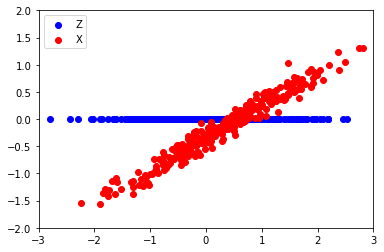

In [9]:
scatter(real_Z[:, 0], np.zeros(len(real_Z)), c="b", label="Z")
scatter(X[:, 0], X[:, 1], c="r", label="X")
xlim(-3, 3)
ylim(-2, 2)
legend()

Let us see how well $\boldsymbol{Z}$ is reconstructed. Red lines connect corresponding real and estimated samples.

In [10]:
ppca = ProbabilisitcPCA(1)
ppca.fit(X)
Z = ppca.transform(X)

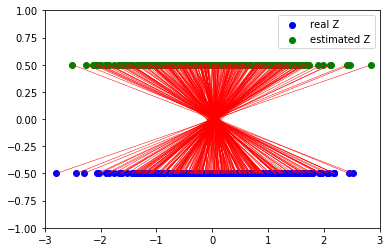

In [11]:
scatter(real_Z[:, 0], -0.5 * np.ones(len(real_Z)),
        c="b", label="real Z")
scatter(Z[:, 0], 0.5 * np.ones(len(Z)),
        c="g", label="estimated Z")
for z_real, z_est in zip(real_Z[:, 0], Z[:, 0]):
    plot([z_real, z_est], [-0.5, 0.5], c="r", lw=0.5)
xlim(-3, 3)
ylim(-1, 1)
legend()

In [12]:
real_mu

array([ 0.4, -0.1])

In [13]:
ppca.mu_

array([ 0.32459438, -0.13958096])

In [14]:
real_W

array([[-1. ],
       [-0.6]])

In [15]:
ppca.W_

array([[ 0.98755166],
       [ 0.61282053]])

The mean is estimated quite well, but $\boldsymbol{W}$ does not fit at all. Because the real latent samples are unknown, expectation maximization (EM) will just find one plausible solution. In general, EM will only find locally optimal solutions. If we project a line from the latent space to the observable space, however, the result looks perfect:

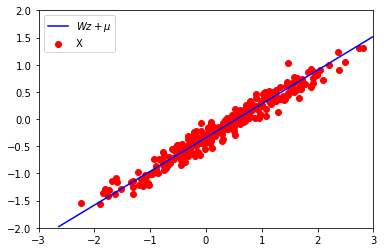

In [16]:
Z_test = np.linspace(-3, 3, 100)[:, np.newaxis]
X_test = ppca.inverse_transform(Z_test)
plot(X_test[:, 0], X_test[:, 1], c="b", label="$W z + \mu$")
scatter(X[:, 0], X[:, 1], c="r", label="X")
xlim(-3, 3)
ylim(-2, 2)
legend()

## Summary

Maximum likelihood estimates (MLE) are useful but how they are generated is often very specific for the problem at hand. In general, it is often a good idea to frame machine learning problems in a probabilistic perspective and think about how to express it as a maximum likelihood problem.

For example, classification (logistic regression), clustering (Gaussian mixture models), regression (linear regression), reinforcement learning (reward-weighted regression) and many more fields rely on maximum likelihood estimates.

There are several ways to solve these problems. Usually it is either a direct optimization problem in which we can minimize the negative log-likelihood or several variables are unknown and we could use expectation maximization.

If we want to add regularization, we could instead compute the maximum a posteriori estimate (MAP), which means that we include a specific prior distribution for the variables that we want to estimate.